# HW4 - Data Analytics
- Analyze the data (statistics. correlation…)
- Define a reasonable problem (classification. regression. clustering...) and predict the results
- Explain how you improved your results step-by-step
- Original result -> Reasons -> Your approaches -> Improvement

## Define the problem
I want to 
So let's drop the unnecessary columns: Unnamed & date
？？？？？？？？？？？？？？？？？？？？

## Preprocessing
Have a peek of the data.
According to the dataset description, there are 6 columns:
1. drugName (categorical): name of drug 
2. condition (categorical): name of condition 
3. review (text): patient review 
4. rating (numerical): 10 star patient rating 
5. date (date): date of review entry 
6. usefulCount (numerical): number of users who found review useful

In [60]:
# Read data

import pandas as pd
import numpy as np

train_data_path = './drugsComments/train.tsv'
test_data_path = './drugsComments/test.tsv'

train_df = pd.read_csv(train_data_path, sep='\t')
test_df = pd.read_csv(test_data_path, sep='\t')

print(train_df.shape)
print(train_df.head())

(161297, 7)
   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015

Drop the columns `Unnamed` and `date`, which are unnecessary. Then, there are 5 columns left:

In [61]:
# Drop unnecessary columns: Unnamed & date

train_df.drop(columns=['Unnamed: 0', 'date'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'date'], inplace=True)

print(train_df.shape)
print(train_df.head())
print('\n')

# Check if there is any null value

print(train_df.info())

(161297, 5)
                   drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  usefulCount  
0  "It has no side effect, I take it in combinati...     9.0           27  
1  "My son is halfway through his fourth week of ...     8.0          192  
2  "I used to take another oral contraceptive, wh...     5.0           17  
3  "This is my first time using any form of birth...     8.0           10  
4  "Suboxone has completely turned my life around...     9.0           37  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 5 columns):
drugName       161297 non-null object
condition      

We can see from the result below that there are null values only in 1 column (`condition`). Having these data with no specified condition is not a big issue for our defined problem, so I didn't drop those data. And we can see the average `rating` is around 7.

In [62]:
# Keep a set which includes all the names of drugs and conditions occurred in the dataset.

import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

drugNameSet_train = set(train_df['drugName'])
conditionNameSet_train = set(train_df['condition'])
drugNameSet_test = set(test_df['drugName'])
conditionNameSet_test = set(test_df['condition'])

oldDrugSet = drugNameSet_train | conditionNameSet_train | drugNameSet_test | conditionNameSet_test

drugSet = set()

print('drug names which are filtered out:')
for drug in oldDrugSet:
    drugStr = str(drug).lower()
    if not("helpful." in drugStr):
        drugStr = REPLACE_NO_SPACE.sub("", drugStr)
        drugStr = re.sub("\d+", "", drugStr)
        #drugStr = lemmatizer.lemmatize(drugStr)
        drugStr = stemmer.stem(drugStr)
        drugSet.add(drugStr)
    else:
        print(drugStr)

drugSet.remove('nan')

# Print `drugSet`

print('\n')
print(len(drugSet))
print('\n')
showNum = 20
countNum = 0
for drug in drugSet:
    print(drug)
    countNum += 1
    if(countNum == showNum):
        break

drug names which are filtered out:
47</span> users found this comment helpful.
46</span> users found this comment helpful.
54</span> users found this comment helpful.
121</span> users found this comment helpful.
29</span> users found this comment helpful.
13</span> users found this comment helpful.
61</span> users found this comment helpful.
1</span> users found this comment helpful.
21</span> users found this comment helpful.
36</span> users found this comment helpful.
33</span> users found this comment helpful.
26</span> users found this comment helpful.
34</span> users found this comment helpful.
145</span> users found this comment helpful.
28</span> users found this comment helpful.
30</span> users found this comment helpful.
11</span> users found this comment helpful.
5</span> users found this comment helpful.
8</span> users found this comment helpful.
23</span> users found this comment helpful.
146</span> users found this comment helpful.
27</span> users found this comment helpfu

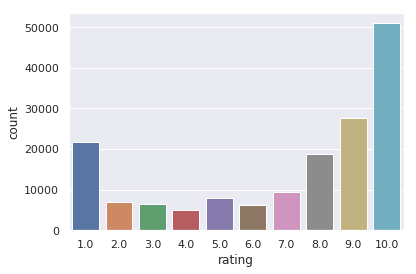

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64


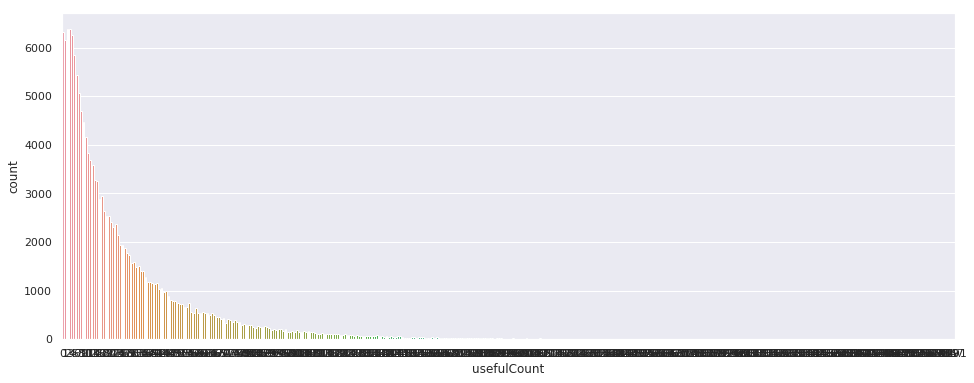

In [63]:
# Plot the counts of each ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=train_df)
plt.show()
print(train_df.groupby(['rating']).size())


# Plot the counts of each usefulCount

plt.figure(figsize=(16, 6))
sns.set()
ax = sns.countplot(x="usefulCount", data=train_df)

plt.show()

In [64]:
# Categorize the columns `drugName` and `condition`

train_df['drugName'] = train_df['drugName'].astype('category')
train_df['condition'] = train_df['condition'].astype('category')

cat_columns = train_df.select_dtypes(['category']).columns
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)

#train_df['drugName_c'] = train_df['drugName'].apply(lambda x: x.cat.codes)
#train_df['condition_c'] = train_df['condition'].apply(lambda x: x.cat.codes)

print(train_df.shape)
print(train_df.head())
print(train_df.describe())

(161297, 5)
   drugName  condition                                             review  \
0      3203        466  "It has no side effect, I take it in combinati...   
1      1431         73  "My son is halfway through his fourth week of ...   
2      1854        165  "I used to take another oral contraceptive, wh...   
3      2285        165  "This is my first time using any form of birth...   
4       516        574  "Suboxone has completely turned my life around...   

   rating  usefulCount  
0     9.0           27  
1     8.0          192  
2     5.0           17  
3     8.0           10  
4     9.0           37  
            drugName      condition         rating    usefulCount
count  161297.000000  161297.000000  161297.000000  161297.000000
mean     1706.315610     356.111440       6.994377      28.004755
std       942.790948     236.961905       3.272329      36.403742
min         0.000000      -1.000000       1.000000       0.000000
25%       988.000000     165.000000       5.0

    rating polarity
0      9.0        1
1      8.0        1
2      5.0        0
3      8.0        1
4      9.0        1
5      2.0       -1
6      1.0       -1
7     10.0        1
8      1.0       -1
9      8.0        1
10     9.0        1
11    10.0        1
12     4.0       -1
13     4.0       -1
14     3.0       -1
15     9.0        1
16     9.0        1
17     9.0        1
18    10.0        1
19    10.0        1
20     8.0        1
21    10.0        1
22     9.0        1
23    10.0        1
24     1.0       -1
25     7.0        0
26    10.0        1
27    10.0        1
28     6.0        0
29     8.0        1
training data:


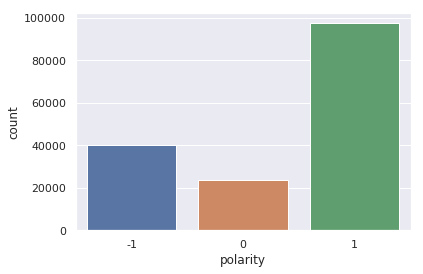

testing data:


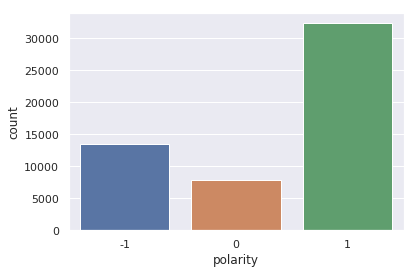

In [65]:
# Define `polarity`

train_df['polarity'] = pd.cut(train_df['rating'], bins=[-1, 4, 7, 10], labels=[-1, 0, 1])
test_df['polarity'] = pd.cut(test_df['rating'], bins=[-1, 4, 7, 10], labels=[-1, 0, 1])

print(train_df[['rating', 'polarity']].head(30))


# Plot the counts of each `polarity`

print('training data:')
plt.figure()
sns.set()
ax = sns.countplot(x="polarity", data=train_df)
plt.show()

print('testing data:')
plt.figure()
sns.set()
ax = sns.countplot(x="polarity", data=test_df)
plt.show()

In [66]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm

#tqdm_pandas(tqdm())
tqdm.pandas()

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

stopWords = set(stopwords.words('english'))

def filter_stopwords(sentence):
    sentence = sentence.replace("&#039;", "'")
    sentence = sentence.lower()
    
    sentence = REPLACE_NO_SPACE.sub("", sentence)
    sentence = REPLACE_WITH_SPACE.sub(" ", sentence)
    sentence = re.sub("\d+", "", sentence)
    
    words = word_tokenize(sentence)
    wordsFiltered = []
    for w in words:
        #w_lemma = lemmatizer.lemmatize(w)
        w_lemma = stemmer.stem(w)
        if (w_lemma not in stopWords) and (w_lemma not in drugSet):
            wordsFiltered.append(w_lemma)
    joinStr = " "
    return joinStr.join(wordsFiltered)


print(train_df['review'].head().values)

train_df['review'] = train_df['review'].progress_apply(filter_stopwords)
test_df['review'] = test_df['review'].progress_apply(filter_stopwords)

print('\n')
print(train_df['review'].head().values)

  0%|          | 23/161297 [00:00<12:21, 217.49it/s]

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'
 '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone

100%|██████████| 53766/53766 [02:45<00:00, 324.46it/s]



['ha side effect take combin mg fish oil'
 'son halfway hi fourth week becam concern began thi last week start take highest dose two day could hardli get bed wa veri cranki slept nearli hour drive home school vacat veri unusu call hi doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal hi behavior better tri mani differ medic far thi effect'
 'use take anoth oral contracept pill cycl wa veri happi veri light period max day side effect contain hormon gestoden avail us switch becaus ingredi similar pill end start immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side didnt ani side effect idea period free wa tempt ala'
 'thi first time use ani form birth control im glad went patch month first decreas libido subsid onli downsid made period longer day 

   drugName  condition                                             review  \
0      3203        466             ha side effect take combin mg fish oil   
1      1431         73  son halfway hi fourth week becam concern began...   
2      1854        165  use take anoth oral contracept pill cycl wa ve...   
3      2285        165  thi first time use ani form birth control im g...   
4       516        574  ha complet turn life around feel healthier im ...   
5       669        160  nd day mg start work rock hard erect howev exp...   
6      1748        303  pull cum bit took plan b hour later took pregn...   
7       260        164  chang life hope wa first start age clondin man...   
8      1662        313  noth problem keppera constant shake arm & amp ...   
9      1181        165  pill mani year doctor chang rx wa effect reall...   

   rating  usefulCount polarity  commentLength  
0     9.0           27        1             38  
1     8.0          192        1            397  
2    

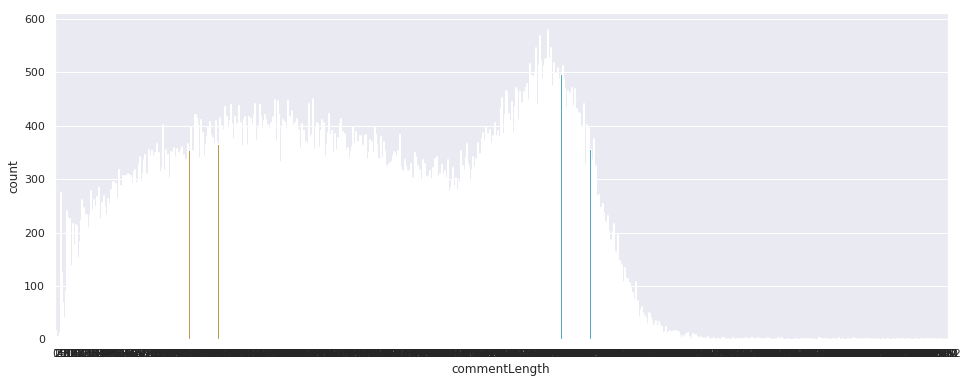

            drugName      condition         rating    usefulCount  \
count  161285.000000  161285.000000  161285.000000  161285.000000   
mean     1706.267173     356.105453       6.994426      28.003249   
std       942.791614     236.964313       3.272286      36.403063   
min         0.000000      -1.000000       1.000000       0.000000   
25%       988.000000     165.000000       5.000000       6.000000   
50%      1748.000000     262.000000       8.000000      16.000000   
75%      2449.000000     563.000000      10.000000      36.000000   
max      3435.000000     883.000000      10.000000    1291.000000   

       commentLength  
count  161285.000000  
mean      240.830406  
std       128.319962  
min         0.000000  
25%       135.000000  
50%       237.000000  
75%       356.000000  
max      1854.000000  
(161285, 7)


In [67]:
# Plot comment length

train_df['commentLength'] = train_df['review'].apply(lambda x: len(x))
print(train_df.head(10))
print(train_df.describe())
print(train_df.shape)

plt.figure(figsize=(16, 6))
sns.set()
ax = sns.countplot(x="commentLength", data=train_df)

plt.show()

train_df = train_df[ (train_df.commentLength < 2000) ]
print(train_df.describe())
print(train_df.shape)

In [68]:
#from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer    
from sklearn.feature_extraction.text import CountVectorizer
import datetime

print(datetime.datetime.now())
print(train_df.head(15))

vectorizer = CountVectorizer()  
transformer = TfidfTransformer()  

#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵  
#tfidf = transformer.fit_transform(vectorizer.fit_transform(train_df['review']))
vectorizer.fit(train_df['review'])
data_train_x_count = vectorizer.transform(train_df['review'])
data_test_x_count = vectorizer.transform(test_df['review'])

transformer.fit(data_train_x_count)
data_train_x = transformer.transform(data_train_x_count)
data_test_x = transformer.transform(data_test_x_count)

print('\ntfidf:')
print(data_train_x.shape)
print(type(data_train_x))

print(datetime.datetime.now())

2019-05-16 00:03:50.875792
    drugName  condition                                             review  \
0       3203        466             ha side effect take combin mg fish oil   
1       1431         73  son halfway hi fourth week becam concern began...   
2       1854        165  use take anoth oral contracept pill cycl wa ve...   
3       2285        165  thi first time use ani form birth control im g...   
4        516        574  ha complet turn life around feel healthier im ...   
5        669        160  nd day mg start work rock hard erect howev exp...   
6       1748        303  pull cum bit took plan b hour later took pregn...   
7        260        164  chang life hope wa first start age clondin man...   
8       1662        313  noth problem keppera constant shake arm & amp ...   
9       1181        165  pill mani year doctor chang rx wa effect reall...   
10      3062        506  thi medic almost two week start mg work way mg...   
11      1685        262  taken anti y

In [69]:
print(datetime.datetime.now())

#获取词袋模型中的所有词语   
words = vectorizer.get_feature_names()  
print(len(words))
"""
showNum = 30
countNum = 0
for word in words:
    print(word)
    countNum += 1
    if(countNum == showNum):
        break

# weights = tfidf.asarray()  
# print(len(weights))
showNum = 30
countNum = 0
for weight in data_train_x:
    print(weight)
    countNum += 1
    if(countNum == showNum):
        break
"""

2019-05-16 00:04:14.534929
43090


'\nshowNum = 30\ncountNum = 0\nfor word in words:\n    print(word)\n    countNum += 1\n    if(countNum == showNum):\n        break\n\n# weights = tfidf.asarray()  \n# print(len(weights))\nshowNum = 30\ncountNum = 0\nfor weight in data_train_x:\n    print(weight)\n    countNum += 1\n    if(countNum == showNum):\n        break\n'

In [70]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score

print(datetime.datetime.now())

lr_model = LogisticRegression(max_iter=1000)
#lr_model = SGDClassifier(loss='log',  max_iter=800)
lr_model.fit(data_train_x, train_df['polarity'])

predict_train_y = lr_model.predict(data_train_x)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], predict_train_y))

lr_predict_test_y = lr_model.predict(data_test_x)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], lr_predict_test_y))

2019-05-16 00:04:15.068345
training accuracy:
0.7615773320519578

testing accuracy:
0.7430904288955845


In [71]:
ori_ori_data_train_x = data_train_x
ori_data_train_x = data_train_x

In [72]:
from sklearn.svm import SVC

print(datetime.datetime.now())
print('\n')

print(data_train_x.shape)
print(train_df['polarity'].shape)

print(type(data_train_x))

print(data_train_x[0])
print(data_train_x[0].toarray().shape)

# Here !!!!!!!!!!!!!!!!!!!
# Normalize data

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

#scaler = MinMaxScaler()
#scaler = RobustScaler()
scaler = StandardScaler(with_mean=False)
scaler.fit(data_train_x) #scaler.fit(train_df.append(test_df, ignore_index=True))

train_normalize = scaler.transform(data_train_x)
#train_normalize = np.transpose(train_normalize)

test_normalize = scaler.transform(data_test_x)
#test_normalize = np.transpose(test_normalize)

print('shape after scaling:')
print(train_normalize.shape)
print('\n')

# Up There !!!!!!!!!!!!!!!

svc_model = SVC(kernel='linear', max_iter=50) #(kernel='linear', C=1, tol=1e-5)
svc_model.fit(train_normalize, train_df['polarity'])

predict_train_y = svc_model.predict(train_normalize)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], predict_train_y))

svc_predict_test_y = svc_model.predict(test_normalize)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], svc_predict_test_y))

print('\n')
print(datetime.datetime.now())

2019-05-16 00:04:28.789668


(161285, 43090)
(161285,)
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 37117)	0.1507057840943077
  (0, 34356)	0.18138486645706992
  (0, 25356)	0.5204417142963665
  (0, 22295)	0.21454851143178258
  (0, 15513)	0.19424748845401935
  (0, 13441)	0.6201883884160915
  (0, 11195)	0.17222934461875522
  (0, 6961)	0.4188889877746695
(1, 43090)
shape after scaling:
(161285, 43090)


training accuracy:
0.5736181293982702

testing accuracy:
0.572090168507979


2019-05-16 00:04:44.428769


In [73]:
# tfidf - naive bayes

from sklearn.naive_bayes import MultinomialNB

print(datetime.datetime.now())
print('\n')

nb_model = MultinomialNB()
nb_model.fit(data_train_x, train_df['polarity'])

predict_train_y = nb_model.predict(data_train_x)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], predict_train_y))

svc_predict_test_y = nb_model.predict(data_test_x)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], svc_predict_test_y))

print('\n')
print(datetime.datetime.now())

2019-05-16 00:04:44.439733


training accuracy:
0.6617540378832502

testing accuracy:
0.6492392962095004


2019-05-16 00:04:44.650260


In [76]:
# count - naive bayes

from sklearn.naive_bayes import MultinomialNB

print(datetime.datetime.now())
print('\n')

print(data_train_x_count.shape)
print(data_train_x_count[0])

nb_model = MultinomialNB()
nb_model.fit(data_train_x_count, train_df['polarity'])

predict_train_y = nb_model.predict(data_train_x_count)
print('training accuracy:')
print(accuracy_score(train_df['polarity'], predict_train_y))

svc_predict_test_y = nb_model.predict(data_test_x_count)
print('\ntesting accuracy:')
print(accuracy_score(test_df['polarity'], svc_predict_test_y))

print('\n')
print(datetime.datetime.now())

2019-05-16 00:52:28.625533


(161285, 43090)
  (0, 6961)	1
  (0, 11195)	1
  (0, 13441)	1
  (0, 15513)	1
  (0, 22295)	1
  (0, 25356)	1
  (0, 34356)	1
  (0, 37117)	1
training accuracy:
0.7303283008339275

testing accuracy:
0.7069709481828665


2019-05-16 00:52:28.928152


- drugSet cleaning